### 3) A) 1)
Importing libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Making X, epsilon and T and save it into 'data' file (this input box should run once)

In [2]:
# X = np.random.rand(100)
# epsilon = np.random.normal(0, math.sqrt(2), 100)
# T = X ** 3 - 3 * X ** 2 - X + 3 + epsilon
# np.save('data', [X, epsilon, T])

Read from 'data' file

In [3]:
X, epsilon, T = np.load('data.npy')

Making kernel function

In [4]:
X = np.array([X**i for i in range(0, 11)]).transpose()

Creating lambda (alpha in code)

In [5]:
alphas = np.logspace(-8, 4, 13)

Defining some variables to summarise the RMSE errors in it through iterations

In [6]:
rmse_train_total = []
rmse_test_total = []

Looping 100 times on alphas to calculate mean square error.

In [7]:
for _ in range(0, 100):
	X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.7)

	rmse_train = []
	rmse_test = []

	for alpha in alphas:
		ridge = Ridge(alpha=alpha)
		ridge.fit(X_train, T_train)

		pred_train = ridge.predict(X_train)
		rmse_train.append(math.sqrt(mean_squared_error(T_train, pred_train)))

		pred_test = ridge.predict(X_test)
		rmse_test.append(math.sqrt(mean_squared_error(T_test, pred_test)))

	rmse_train_total.append(rmse_train)
	rmse_test_total.append(rmse_test)

At the end I'll plot RMSE mean for each lambda:

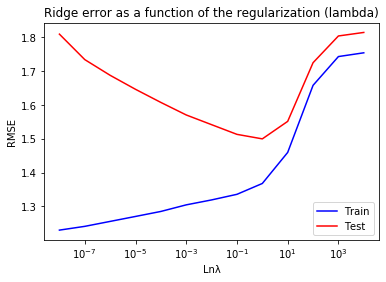

In [8]:
ax = plt.gca()
ax.plot(alphas, np.mean(rmse_train_total, axis=0), 'b')
ax.plot(alphas, np.mean(rmse_test_total, axis=0), 'r')
plt.xscale('log')
plt.xlabel('Lnλ')
plt.ylabel('RMSE')
plt.legend(['Train', 'Test'])
plt.title('Ridge error as a function of the regularization (lambda)')
plt.axis('tight')
plt.show()

We can see that, after some value of Lambda, test and train error will increase.

### 3) A) 2)
In this section libraries are imported in the previous question and variables like X and T has their value. So I should import more libraries (kFold) and use it (we have 10 folds so I n_splits would be 10):

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

Defining some other variables to summarize the RMSE errors in it through iterations

In [10]:
rmse_train_total = []
rmse_validation_total = []
rmse_test_total = []

Looping 100 times on alphas to calculate mean square error.

In [11]:
for _ in range(0, 100):

    X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.7)

    fold_rmse_train = []
    fold_rmse_validation = []
    fold_rmse_test = []

    for train_index, validation_index in kf.split(X_train):
        X_train, X_validation = X[train_index], X[validation_index] 
        T_train, T_validation = T[train_index], T[validation_index]

        rmse_train = []
        rmse_validation = []
        rmse_test = []

        for alpha in alphas:
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, T_train)
            
            pred_train = ridge.predict(X_train)
            rmse_train.append(math.sqrt(mean_squared_error(T_train, pred_train)))

            pred_validation = ridge.predict(X_validation)
            rmse_validation.append(math.sqrt(mean_squared_error(T_validation, pred_validation)))

            pred_test = ridge.predict(X_test)
            rmse_test.append(math.sqrt(mean_squared_error(T_test, pred_test)))

        fold_rmse_train.append(rmse_train)
        fold_rmse_validation.append(rmse_validation)
        fold_rmse_test.append(rmse_test)

    rmse_train_total.append(fold_rmse_train)
    rmse_validation_total.append(fold_rmse_validation)
    rmse_test_total.append(fold_rmse_test)

rmse_train_total = np.array(rmse_train_total)
rmse_validation_total = np.array(rmse_validation_total)
rmse_test_total = np.array(rmse_test_total)
    

find means of EMSE errors and plot them:

In [12]:
train_mean = np.mean(rmse_train_total, axis=0)
train_mean_final = np.mean(train_mean, axis=0)

validation_mean = np.mean(rmse_validation_total, axis=0)
validation_mean_final = np.mean(validation_mean, axis=0)

test_mean = np.mean(rmse_test_total, axis=0)
test_mean_final = np.mean(test_mean, axis=0)


best lambda and validation amount for best lambda would be:

In [13]:
print('BEST λ : ' + str(alphas[np.argmin(test_mean_final)]))
print('VALIDATION AMOUNT FOR BEST λ : ' + str(validation_mean_final[np.argmin(test_mean_final)]))

BEST λ : 10.0
VALIDATION AMOUNT FOR BEST λ : 1.6392201786745513


plot RMSE means:

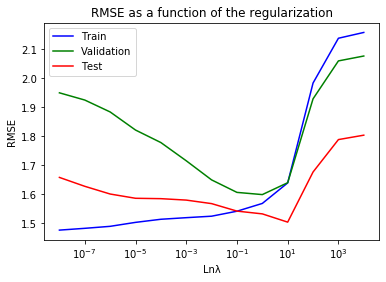

In [14]:
ax = plt.gca()
ax.plot(alphas, train_mean_final, 'b')
ax.plot(alphas, validation_mean_final, 'g')
ax.plot(alphas, test_mean_final, 'r')
plt.xscale('log')
plt.xlabel('Lnλ')
plt.ylabel('RMSE')
plt.legend(['Train', 'Validation', 'Test'])
plt.title('RMSE as a function of the regularization')
plt.axis('tight')
plt.show()

We can see that in Lambda=10 the error for all starts to increase

### 3) B) 1)
defining DX and DT and save them to 'data2' file. (runs just once).

In [15]:
L_SIZE = 50
X_SIZE = 20

# DX = []
# DT = []

# for i in range(0, L_SIZE):
#     X = np.random.uniform(-3, 3, X_SIZE)
#     epsilon = np.random.normal(0, math.sqrt(2), X_SIZE)
#     T = X ** 3 - 3 * X ** 2 - X + 3 + epsilon

#     DX.append(X)
#     DT.append(T)

# np.save('data2', [DX, DT])

load Dx and DT from 'data2' file

In [16]:
DX, DT = np.load('data2.npy')

Defining vaiables to calculate mean of them:

In [17]:
rmse = []
bias = []
variance = []

Defining H(x) for calculating (BIAS)^2

In [18]:
hx = np.mean(DT, axis=0)

Iterating over Lambdas to find mean of RMSE, (BIAS)^2 and Variance

In [19]:
for alpha in alphas:

    pred_array = []
    rmse_array = []

    for X, T in zip(DX, DT):

        phi_X = np.array([X**i for i in range(0, 11)]).transpose()

        ridge = Ridge(alpha=alpha)
        ridge.fit(phi_X, T)

        pred = ridge.predict(phi_X)
        rmse_array.append(math.sqrt(mean_squared_error(T, pred)))

        pred_array.append(pred)

    yhat = np.mean(pred_array, axis=0)
    bias.append(mean_squared_error(yhat, hx))

    rmse.append(np.mean(rmse_array, axis=0))
    
    var = []
    for pred in pred_array:
        var.append(mean_squared_error(pred, yhat))

    variance.append(np.mean(var) / X_SIZE)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.21505e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64187e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.97721e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11846e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.76933e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs

plot the variables:

In [20]:
ax = plt.gca()
ax.plot(alphas, bias, 'r')
ax.plot(alphas, variance, 'g')
ax.plot(alphas, rmse, 'b')
plt.xscale('log')
plt.xlabel('Lnλ')
plt.legend(['Bias^2', 'Variance', 'RMSE'])
plt.title('Ridge error, bias and variance as a function of the regularization')
plt.axis('tight')
plt.show()

### 3) B) 2)
repeating previous question for size of 200

In [21]:
L_SIZE = 50
X_SIZE = 200

# DX = []
# DT = []

# for i in range(0, L_SIZE):
#     X = np.random.uniform(-3, 3, X_SIZE)
#     epsilon = np.random.normal(0, math.sqrt(2), X_SIZE)
#     T = X ** 3 - 3 * X ** 2 - X + 3 + epsilon

#     DX.append(X)
#     DT.append(T)

np.save('data3', [DX, DT])
rmse = []
bias = []
variance = []
hx = np.mean(DT, axis=0)

for alpha in alphas:

    pred_array = []
    rmse_array = []

    for X, T in zip(DX, DT):

        phi_X = np.array([X**i for i in range(0, 11)]).transpose()

        ridge = Ridge(alpha=alpha)
        ridge.fit(phi_X, T)

        pred = ridge.predict(phi_X)
        rmse_array.append(math.sqrt(mean_squared_error(T, pred)))

        pred_array.append(pred)

    yhat = np.mean(pred_array, axis=0)
    bias.append(mean_squared_error(yhat, hx))

    rmse.append(np.mean(rmse_array, axis=0))
    
    var = []
    for pred in pred_array:
        var.append(mean_squared_error(pred, yhat))

    variance.append(np.mean(var) / X_SIZE)
    
ax = plt.gca()
ax.plot(alphas, bias, 'r')
ax.plot(alphas, variance, 'g')
ax.plot(alphas, rmse, 'b')
plt.xscale('log')
plt.xlabel('Lnλ')
plt.legend(['Bias^2', 'Variance', 'RMSE'])
plt.title('Ridge error, bias and variance as a function of the regularization')
plt.axis('tight')
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.21505e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64187e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.97721e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11846e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.76933e-19): result may not be accurate.
  overwrite_a=True).T
/srv/conda/envs

We can see that increasing dataset size has not affect bias and just model complexity can change it, but by increasing size of dataset, the variance decreased which means that overfit would not occur if we increase the size of dataset.